### Supplement Sales EDA 
https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('..\Supplement_Sales_Weekly_Expanded.csv', parse_dates=['Date'], index_col='Date')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\conif\AppData\Local\Temp\ipykernel_11492\4252652465.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('..\Supplement_Sales_Weekly_Expanded.csv', parse_dates=['Date'], index_col='Date')


,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
Date,,,,,,,,,
2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [4]:
df.isna().sum()

Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [5]:
df.shape

(4384, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4384 entries, 2020-01-06 to 2025-03-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    4384 non-null   object 
 1   Category        4384 non-null   object 
 2   Units Sold      4384 non-null   int64  
 3   Price           4384 non-null   float64
 4   Revenue         4384 non-null   float64
 5   Discount        4384 non-null   float64
 6   Units Returned  4384 non-null   int64  
 7   Location        4384 non-null   object 
 8   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 342.5+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


Supplement Sales - Aims
1.	To identify the most and least profitable products
2.	To identify best and worst platforms with respect to
    a. Sales of products
    b. Returns
3.	To identify the best and worst locations with respect to
    a.	Sales of products
    b.	Returns


In [9]:
df.describe(include='object')

,Product Name,Category,Location,Platform
count,4384,4384,4384,4384
unique,16,10,3,3
top,Whey Protein,Vitamin,Canada,iHerb
freq,274,822,1507,1499


In [14]:
df.groupby("Date").aggregate({'Revenue': 'sum', 'Units Sold': 'sum', 'Units Returned' : 'sum'}).reset_index().head()

,Date,Revenue,Units Sold,Units Returned
0,2020-01-06,71848.56,2406,19
1,2020-01-13,72416.18,2374,27
2,2020-01-20,76152.42,2370,26
3,2020-01-27,70306.73,2397,29
4,2020-02-03,98011.64,2384,34


Text(0.5, 1.0, 'Revenue Over Time')

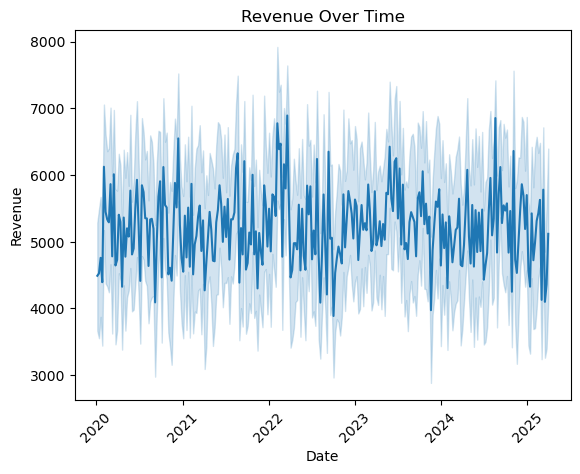

In [16]:
sns.lineplot(data=df, x='Date', y='Revenue')
plt.xticks(rotation=45)
plt.title('Revenue Over Time')  

In [ ]:
df['Product Name'].value_counts()

Product Name
Whey Protein          274
Vitamin C             274
Fish Oil              274
Multivitamin          274
Pre-Workout           274
BCAA                  274
Creatine              274
Zinc                  274
Collagen Peptides     274
Magnesium             274
Ashwagandha           274
Melatonin             274
Biotin                274
Green Tea Extract     274
Iron Supplement       274
Electrolyte Powder    274
Name: count, dtype: int64

In [ ]:
df_rev = df.groupby('Product Name').agg({'Revenue': ['sum']}).sort_values(('Revenue', 'sum'), ascending=False)
df_rev.columns = ['Total Revenue']
df_rev = df_rev.reset_index()
df_rev.head(10)

,Product Name,Total Revenue
0,Biotin,1486798.62
1,Zinc,1482546.95
2,Pre-Workout,1477183.78
3,BCAA,1464819.63
4,Fish Oil,1451065.87
5,Green Tea Extract,1440900.05
6,Collagen Peptides,1433297.24
7,Creatine,1432518.40
8,Iron Supplement,1431582.41
9,Whey Protein,1422194.85


Text(0.5, 1.0, 'Top 10 Products by Total Revenue')

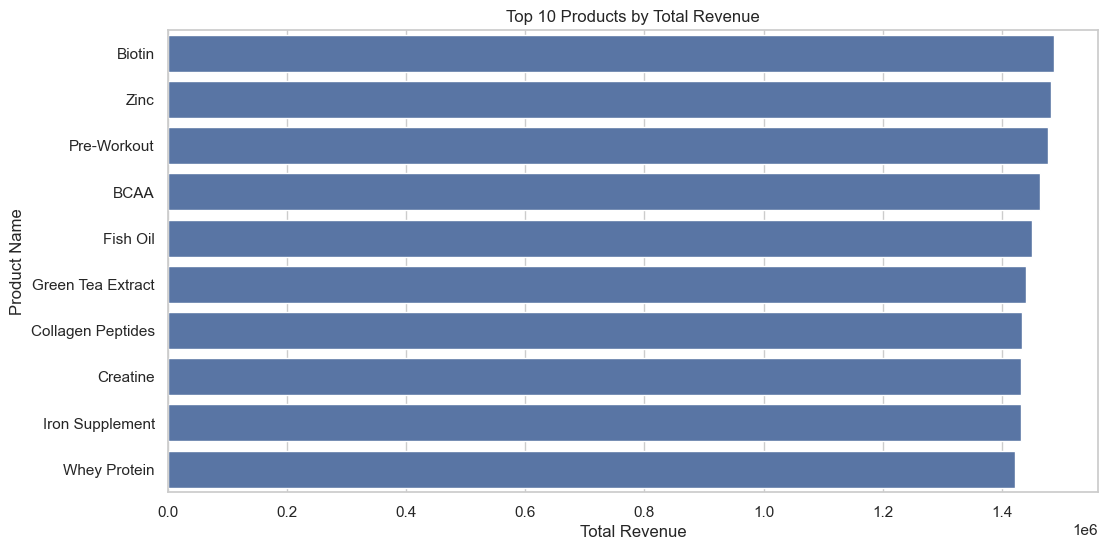

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Total Revenue', y='Product Name', data=df_rev.head(10))
plt.title('Top 10 Products by Total Revenue')

Text(0.5, 1.0, 'Bottom 5 Products by Total Revenue')

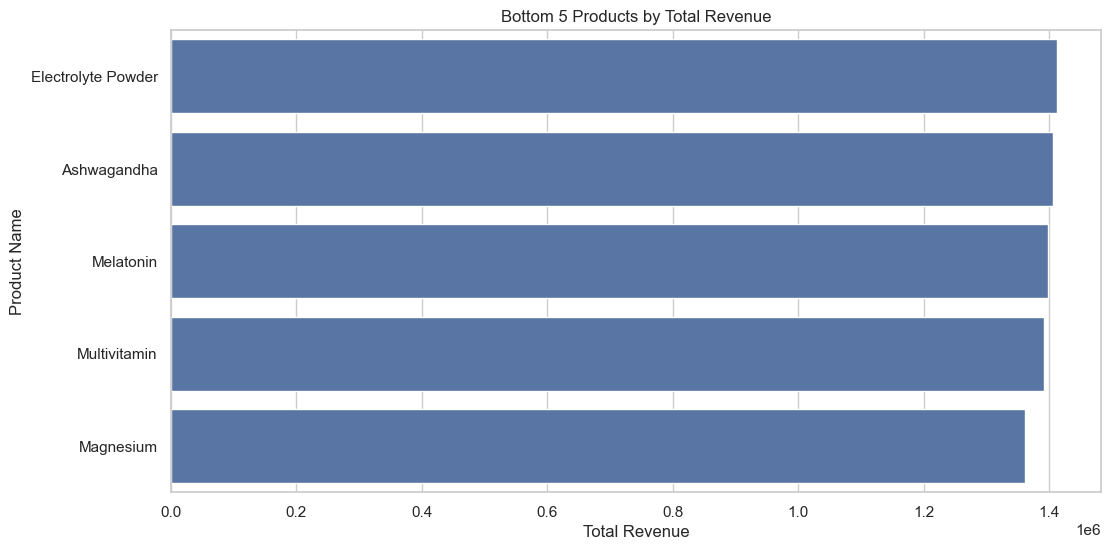

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Total Revenue', y='Product Name', data=df_rev.tail(5))
plt.title('Bottom 5 Products by Total Revenue')